# Midterm Project
##### Alaa Salih, Shivani Patel, Ankitha Yenna, Soham

In [5]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
from sklearn.model_selection import train_test_split 
from sklearn import metrics
%matplotlib inline

## 1- Load Data

In [6]:
df =pd.read_csv("C:\\Users\\Admin\\Documents\\Machine Learning\\Mid Term Project\\train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## 2- Find and Fill the missing data imputation

In [7]:
df.fillna("None", inplace = True) 
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60,9550,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84,14260,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,12,2008,WD,Normal,250000


 ## Features selection - EDA
## 5 New Features:
    We add 5 new features by combine certian features together which are( Age of house,totalSF,Total Porch,Totalbath,and Total above ground) thats could help to remove redundant columns and drop the unnecessary columns pluse features with high missing values. 

    

In [8]:
df['Ageofhouse']=df.YrSold - df.YearBuilt
df["TotalSF"] = df.GrLivArea + df.TotalBsmtSF + df['1stFlrSF'] + df['2ndFlrSF'] + df.WoodDeckSF
df["TotalPorchSF"] = df.OpenPorchSF + df.EnclosedPorch + df.ScreenPorch + df['3SsnPorch']
df["TotalBath"] = df.FullBath + df.BsmtFullBath + df.BsmtHalfBath + df.HalfBath
df["TotalAboveGround"] = df.BedroomAbvGr + df.KitchenAbvGr + df.TotRmsAbvGrd
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Ageofhouse,TotalSF,TotalPorchSF,TotalBath,TotalAboveGround
0,1,60,RL,65,8450,Pave,None,Reg,Lvl,AllPub,...,2,2008,WD,Normal,208500,5,4276,61,4,12
1,2,20,RL,80,9600,Pave,None,Reg,Lvl,AllPub,...,5,2007,WD,Normal,181500,31,4084,0,3,10
2,3,60,RL,68,11250,Pave,None,IR1,Lvl,AllPub,...,9,2008,WD,Normal,223500,7,4492,42,4,10
3,4,70,RL,60,9550,Pave,None,IR1,Lvl,AllPub,...,2,2006,WD,Abnorml,140000,91,4190,307,2,11
4,5,60,RL,84,14260,Pave,None,IR1,Lvl,AllPub,...,12,2008,WD,Normal,250000,8,5733,84,4,14


In [9]:
df = df.drop(['Id', 'LotShape','MSZoning', 'LotFrontage', 'Street', 'LandContour', 'LandSlope', 'Condition1', 'Condition2', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'PavedDrive', 'PoolQC', 'Fence', 'SaleType', 'LotConfig', 'Neighborhood', 'BldgType', 'HouseStyle', 'Alley', 'MiscFeature', 'MoSold', 'GarageCars', 'OpenPorchSF',
             'EnclosedPorch', 'ScreenPorch','3SsnPorch', '1stFlrSF', '2ndFlrSF', 'WoodDeckSF', 'YearBuilt', 'YrSold', 'GrLivArea', 'TotalBsmtSF', 'FullBath', 'BsmtFullBath', 'BsmtHalfBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Utilities'], axis=1)
df.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearRemodAdd,ExterCond,BsmtCond,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageCond,PoolArea,MiscVal,SaleCondition,SalePrice,Ageofhouse,TotalSF,TotalPorchSF,TotalBath,TotalAboveGround
0,60,8450,7,5,2003,TA,TA,706,0,150,...,TA,0,0,Normal,208500,5,4276,61,4,12
1,20,9600,6,8,1976,TA,TA,978,0,284,...,TA,0,0,Normal,181500,31,4084,0,3,10
2,60,11250,7,5,2002,TA,TA,486,0,434,...,TA,0,0,Normal,223500,7,4492,42,4,10
3,70,9550,7,5,1970,TA,Gd,216,0,540,...,TA,0,0,Abnorml,140000,91,4190,307,2,11
4,60,14260,8,5,2000,TA,TA,655,0,490,...,TA,0,0,Normal,250000,8,5733,84,4,14


## Handle the Categories Featutes 

In [10]:
from sklearn.preprocessing import LabelEncoder
cols=['ExterCond', 'BsmtCond', 'HeatingQC', 'CentralAir', 'Electrical', 'Functional', 'GarageQual', 'GarageCond', 'SaleCondition']
df[cols]= df[cols].apply(LabelEncoder().fit_transform)


In [11]:
train=df.drop(['SalePrice'],1)

## Extracting important features using random forest
    Use filter method by find the strong relation between target(SalePrice) and dependant varaiables.

In [13]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=1, max_depth=10)
model.fit(train,df.SalePrice)

RandomForestRegressor(max_depth=10, random_state=1)

In [14]:
train.columns.values

array(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearRemodAdd', 'ExterCond', 'BsmtCond', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'HeatingQC', 'CentralAir', 'Electrical',
       'LowQualFinSF', 'Functional', 'Fireplaces', 'GarageArea',
       'GarageQual', 'GarageCond', 'PoolArea', 'MiscVal', 'SaleCondition',
       'Ageofhouse', 'TotalSF', 'TotalPorchSF', 'TotalBath',
       'TotalAboveGround'], dtype=object)

In [15]:
model.feature_importances_

array([3.36863714e-03, 1.98887174e-02, 4.63415804e-01, 6.15831322e-03,
       1.93243537e-02, 8.87670918e-04, 6.98082250e-04, 3.58546968e-02,
       1.16197040e-03, 8.66348371e-03, 1.30406030e-03, 2.99774997e-03,
       1.81883755e-04, 2.24691637e-04, 1.59910309e-03, 5.59707418e-03,
       1.87630163e-02, 9.76629958e-04, 6.28918022e-04, 6.50892327e-03,
       1.27333852e-04, 3.22317978e-03, 2.84045220e-02, 3.46896341e-01,
       7.23407648e-03, 9.85910898e-03, 6.05165844e-03])

In [16]:
dict(reversed(sorted(zip(model.feature_importances_, train.columns.values))))

{0.46341580361130513: 'OverallQual',
 0.34689634073940967: 'TotalSF',
 0.03585469680211185: 'BsmtFinSF1',
 0.02840452204007324: 'Ageofhouse',
 0.01988871741891799: 'LotArea',
 0.01932435369187186: 'YearRemodAdd',
 0.018763016333894898: 'GarageArea',
 0.009859108981143753: 'TotalBath',
 0.008663483707304886: 'BsmtUnfSF',
 0.007234076475674796: 'TotalPorchSF',
 0.006508923268008753: 'PoolArea',
 0.006158313220728079: 'OverallCond',
 0.006051658439800491: 'TotalAboveGround',
 0.00559707418233168: 'Fireplaces',
 0.003368637140189789: 'MSSubClass',
 0.0032231797823340205: 'SaleCondition',
 0.0029977499744732092: 'CentralAir',
 0.0015991030933020021: 'Functional',
 0.0013040602995269771: 'HeatingQC',
 0.001161970404096203: 'BsmtFinSF2',
 0.0009766299580083236: 'GarageQual',
 0.0008876709184574227: 'ExterCond',
 0.0006980822498715159: 'BsmtCond',
 0.0006289180224697988: 'GarageCond',
 0.00022469163713132018: 'LowQualFinSF',
 0.0001818837550839886: 'Electrical',
 0.00012733385247846362: 'MiscV

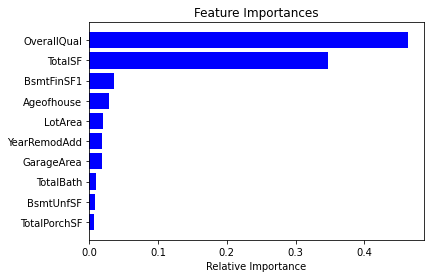

In [17]:
features = train.columns
importances = model.feature_importances_
indices = np.argsort(importances)[-10:]  # top 10 features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [18]:
train=train.drop(['MiscVal', 'Electrical', 'LowQualFinSF', 'GarageCond', 'GarageCond', 'BsmtCond', 'ExterCond', 'GarageQual', 'BsmtFinSF2', 'HeatingQC', 'Functional', 'MSSubClass', 'CentralAir', 'SaleCondition', 'TotalAboveGround', 'PoolArea', 'TotalPorchSF', 'TotalBath'], axis=1)
train['SalePrice']=df['SalePrice'].values
train.head()

,LotArea,OverallQual,OverallCond,YearRemodAdd,BsmtFinSF1,BsmtUnfSF,Fireplaces,GarageArea,Ageofhouse,TotalSF,SalePrice
0,8450,7,5,2003,706,150,0,548,5,4276,208500
1,9600,6,8,1976,978,284,1,460,31,4084,181500
2,11250,7,5,2002,486,434,1,608,7,4492,223500
3,9550,7,5,1970,216,540,1,642,91,4190,140000
4,14260,8,5,2000,655,490,1,836,8,5733,250000


In [19]:
X=train.values
y=train['SalePrice'].values
y

array([208500, 181500, 223500, ..., 266500, 142125, 147500], dtype=int64)

In [20]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42, test_size=0.20)

## 3 ML algorithms

# 1- Linear Regression

In [21]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression() 
regressor.fit(X_train, y_train)

LinearRegression()

In [22]:
print(regressor.intercept_)
print(regressor.coef_)

1.1641532182693481e-10
[-1.67005155e-15 -1.61771510e-11  2.83868369e-12 -7.76807479e-14
 -3.14728216e-15 -2.07883840e-15 -1.88424920e-12  4.69115783e-14
 -8.57445318e-15 -5.03650264e-15  1.00000000e+00]


In [23]:
y_pred = regressor.predict(X_test)
y_pred

array([154500., 325000., 115000., 159000., 315500.,  75500., 311500.,
       146000.,  84500., 135500., 145000., 130000.,  81000., 214000.,
       181000., 134500., 183500., 135000., 118400., 226000., 155000.,
       210000., 173500., 129000., 192000., 153900., 181134., 141000.,
       181000., 208900., 127000., 284000., 200500., 135750., 255000.,
       140000., 138000., 219500., 310000.,  97000., 114500., 205000.,
       119500., 253293., 128500., 117500., 115000., 127000., 451950.,
       144000., 119000., 196000., 115000., 287000., 144500., 260000.,
       213000., 175000., 107000., 107500.,  68500., 154000., 317000.,
       264132., 283463., 243000., 109000., 305000.,  93500., 176000.,
       118858., 134000., 109008.,  93500., 611657., 173000., 348000.,
       341000., 141000., 124900., 118000.,  67000., 113000.,  91300.,
       149500., 133000., 266000., 190000., 155900., 155835., 153500.,
       152000., 124500., 301000., 136500., 169990., 205000., 183900.,
       204900., 2600

In [24]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(15)
df1

,Actual,Predicted
0,154500,154500.0
1,325000,325000.0
2,115000,115000.0
3,159000,159000.0
4,315500,315500.0
5,75500,75500.0
6,311500,311500.0
7,146000,146000.0
8,84500,84500.0
9,135500,135500.0


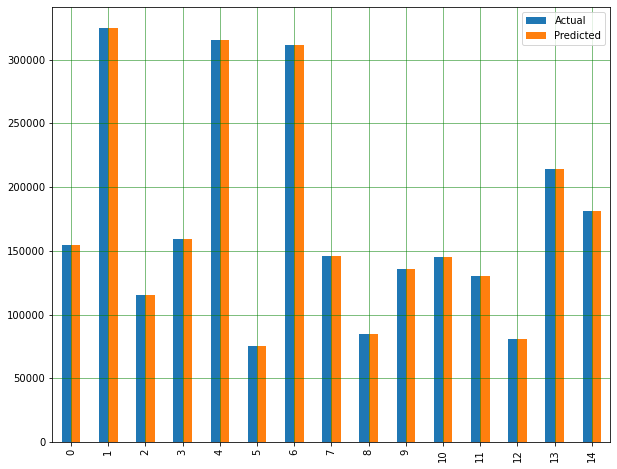

In [25]:
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [26]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-squared Error:', metrics.r2_score(y_test, y_pred))


Mean Absolute Error: 3.804927149608935e-11
Mean Squared Error: 4.149772502076986e-21
Root Mean Squared Error: 6.441872788310078e-11
R-squared Error: 1.0


# 2- SVR

In [27]:
from sklearn.svm import LinearSVC
svm=LinearSVC()

In [28]:
svm.fit(X_train,y_train)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVC()

In [29]:
print(svm.predict(X_train))
print(y_train)

[87000 87000 87000 ... 87000 87000 87000]
[145000 178000  85000 ... 115000 189950 174000]


In [30]:
svm.score(X_train,y_train)

0.004280821917808219

In [31]:
svm.score(X_test,y_test)

0.0

# 3-Decision Tree

In [32]:
from sklearn import neighbors, preprocessing, model_selection
from sklearn.tree import DecisionTreeRegressor

In [33]:
dt_model = DecisionTreeRegressor(random_state=50)

In [34]:
dt_model.fit(X_train,y_train)

DecisionTreeRegressor(random_state=50)

In [35]:
dt_model.score(X_train, y_train)

1.0

In [36]:
dt_model.score(X_test, y_test)

0.9939316296384417

In [37]:
dt_model.predict(X_test)

array([154000., 325300., 115000., 158500., 316600.,  73000., 312500.,
       146000.,  84500., 136000., 145000., 130000.,  81000., 213490.,
       181000., 134500., 182900., 135000., 118500., 226700., 155000.,
       210000., 173733., 129000., 192000., 154000., 181000., 141000.,
       181000., 208500., 127000., 287000., 201000., 136000., 254900.,
       140000., 137900., 219500., 309000.,  97000., 114500., 205000.,
       119500., 252678., 128500., 118000., 115000., 127000., 440000.,
       144000., 119000., 197000., 115000., 286000., 144152., 259000.,
       213000., 174900., 106500., 107400.,  72500., 154000., 315750.,
       264561., 282922., 241500., 109500., 306000.,  92900., 175900.,
       118964., 134000., 109500.,  92900., 501837., 173000., 350000.,
       339750., 141000., 125000., 118000.,  62383., 113000.,  91000.,
       149350., 133000., 265979., 190000., 156000., 157000., 153500.,
       152000., 124500., 303477., 136500., 170000., 205000., 184000.,
       205000., 2600

In [38]:
from sklearn.metrics import accuracy_score
y_pred=dt_model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.476027397260274


##  Models Improvement
## Decision tree improvement

In [39]:
new_y=[]
for i in range(len(y_pred)):
    if (y_pred[i] <= 0.6):
        new_y.append(0)
    else:
        new_y.append(1)

In [40]:
train_accuracy =[]
test_accuracy = []
for depth in range(1,10):
    dt_model = DecisionTreeRegressor(max_depth=depth, random_state=10)
    dt_model.fit(X_train,y_train)
    train_accuracy.append(dt_model.score(X_train,y_train))
    test_accuracy.append(dt_model.score(X_test,y_test))

In [41]:
frame = pd.DataFrame({'max_depth':range(1,10),'train_acc':train_accuracy,'test_acc':test_accuracy})
frame.head()

,max_depth,train_acc,test_acc
0,1,0.612602,0.590656
1,2,0.865650,0.837127
2,3,0.960434,0.956660
3,4,0.989353,0.990518
4,5,0.997529,0.978693


No handles with labels found to put in legend.


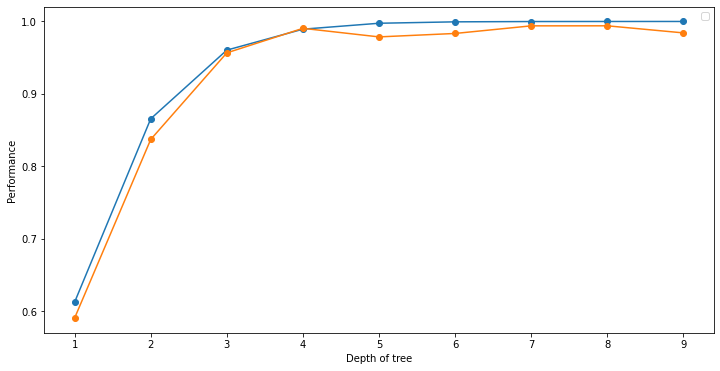

In [42]:
plt.figure(figsize=(12,6))
plt.plot(frame['max_depth'],frame['train_acc'],marker="o")
plt.plot(frame['max_depth'],frame['test_acc'],marker="o")
plt.xlabel('Depth of tree')
plt.ylabel('Performance')
plt.legend()

In [43]:
dt_model = DecisionTreeRegressor(max_depth = 6,max_leaf_nodes =25,random_state=42)

In [44]:
dt_model.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=6, max_leaf_nodes=25, random_state=42)

In [45]:
dt_model.score(X_train,y_train)

0.9958870004604446

In [46]:
dt_model.score(X_test,y_test)

0.964725191558559

In [47]:
from sklearn.preprocessing import MinMaxScaler

In [48]:
data = train.values[:, :-1]

In [49]:
MinMax = MinMaxScaler()
data = MinMax.fit_transform(data)
Train =pd.DataFrame(data)

In [50]:
X=Train.values

In [51]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42, test_size=0.20)

## SVM improvement

In [52]:
from sklearn.svm import LinearSVC
svm=LinearSVC()

In [53]:
svm.fit(X_train,y_train)

LinearSVC()

In [54]:
print(svm.predict(X_train))
print(y_train)

[145000 174000  99900 ... 110000 161000 174000]
[145000 178000  85000 ... 115000 189950 174000]


In [55]:
svm.score(X_train,y_train)

0.13527397260273974

In [56]:
svm.score(X_test,y_test)

0.00684931506849315